In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import datetime,date

from sklearn.preprocessing import Binarizer,LabelEncoder
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
person = pd.read_csv('person.csv')
visit_occurrence = pd.read_csv('visit_occurrence.csv')
condition_occurrence = pd.read_csv('condition_occurrence.csv')
drug_exposure = pd.read_csv('drug_exposure.csv')
death = pd.read_csv('death.csv')


In [3]:
print(person.shape)
print(visit_occurrence.shape)
print(condition_occurrence.shape)
print(death.shape)
print(drug_exposure.shape)

(1000, 18)
(41810, 17)
(12167, 16)
(152, 7)
(46579, 23)


In [4]:
condition = condition_occurrence.iloc[::,0:3]
visit_occurrence_id = condition_occurrence.visit_occurrence_id
condition = pd.concat([condition,visit_occurrence_id],axis=1)
condition

,condition_occurrence_id,person_id,condition_concept_id,visit_occurrence_id
0,1466183,116496,0,36112954
1,1466184,116496,0,36112952
2,1466185,116496,81151,7021052
3,1466186,116496,260139,36112948
4,1466187,116496,312437,36112952
...,...,...,...,...
12162,35049923,2781995,4112343,48895518
12163,35049924,2781995,4112343,48895519
12164,35049925,2781995,4147326,48895521
12165,35049926,2781995,37311061,48895521


In [5]:
visit_enter = visit_occurrence[visit_occurrence.visit_concept_id==9201]
visit_enter = visit_enter.iloc[::,0:6]

In [6]:
visit_enter

,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date
31,3824839,886110,9201,2017-08-10,2017-08-10 00:45:08,2017-08-11
33,1945880,886110,9201,2017-08-17,2017-08-17 00:45:08,2017-08-18
34,1712083,886110,9201,2017-08-24,2017-08-24 00:45:08,2017-10-04
35,4215647,886110,9201,2017-08-25,2017-08-25 06:45:08,2017-10-04
36,2409098,886110,9201,2017-08-26,2017-08-26 10:45:08,2017-10-04
...,...,...,...,...,...,...
41493,787265,226828,9201,2013-08-24,2013-08-24 10:10:16,2013-08-25
41515,133541,226828,9201,2018-06-18,2018-06-18 10:10:16,2018-06-19
41579,3331399,2832949,9201,2005-05-03,2005-05-03 08:31:39,2005-05-04
41597,4278654,13605,9201,2020-03-18,2020-03-18 19:10:24,2020-03-30


In [7]:
df = pd.merge(visit_enter.set_index('visit_occurrence_id'),condition.set_index('visit_occurrence_id'),
              left_index=True,right_index=True,how='inner')
df

,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id
visit_occurrence_id,,,,,,,,
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061670,84436,319049
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061674,84436,437390
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061678,84436,4158346
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061681,84436,36674642
...,...,...,...,...,...,...,...,...
5039590,2286135,9201,2020-03-06,2020-03-06 19:40:51,2020-03-19,28803762,2286135,255848
5039590,2286135,9201,2020-03-06,2020-03-06 19:40:51,2020-03-19,28803765,2286135,319049
5039590,2286135,9201,2020-03-06,2020-03-06 19:40:51,2020-03-19,28803767,2286135,437390


In [8]:
df = df.reset_index().drop_duplicates(['visit_occurrence_id'])
df.reset_index(drop=True,inplace=True)
df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id
0,5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848
1,16371,2694671,9201,2020-02-29,2020-02-29 05:43:37,2020-03-06,33949245,2694671,255848
2,36875,1125305,9201,2020-03-10,2020-03-10 11:02:18,2020-03-18,14176075,1125305,196236
3,41492,1562015,9201,2020-03-13,2020-03-13 18:25:11,2020-03-27,19677236,1562015,255848
4,60431,2248703,9201,1996-08-22,1996-08-22 16:27:56,1996-08-23,28332835,2248703,255848
...,...,...,...,...,...,...,...,...,...
353,4938514,1993263,9201,2016-06-14,2016-06-14 17:51:25,2016-06-15,25118166,1993263,436096
354,4941288,1142083,9201,1990-02-03,1990-02-03 04:30:44,1990-02-04,14387406,1142083,436096
355,5013145,2153104,9201,2003-07-18,2003-07-18 18:41:12,2003-07-19,27128442,2153104,436096
356,5022909,1769327,9201,1990-08-23,1990-08-23 20:54:59,1990-08-24,22291558,1769327,4055754


In [9]:
y = []
for i in range(len(df)):
    start = datetime.strptime(df.visit_start_date[i],'%Y-%m-%d')
    end = datetime.strptime(df.visit_end_date[i],'%Y-%m-%d')
    day = abs(start-end)
    y.append(day.days)
len(y)

358

In [10]:
df['y'] = y
df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y
0,5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9
1,16371,2694671,9201,2020-02-29,2020-02-29 05:43:37,2020-03-06,33949245,2694671,255848,6
2,36875,1125305,9201,2020-03-10,2020-03-10 11:02:18,2020-03-18,14176075,1125305,196236,8
3,41492,1562015,9201,2020-03-13,2020-03-13 18:25:11,2020-03-27,19677236,1562015,255848,14
4,60431,2248703,9201,1996-08-22,1996-08-22 16:27:56,1996-08-23,28332835,2248703,255848,1
...,...,...,...,...,...,...,...,...,...,...
353,4938514,1993263,9201,2016-06-14,2016-06-14 17:51:25,2016-06-15,25118166,1993263,436096,1
354,4941288,1142083,9201,1990-02-03,1990-02-03 04:30:44,1990-02-04,14387406,1142083,436096,1
355,5013145,2153104,9201,2003-07-18,2003-07-18 18:41:12,2003-07-19,27128442,2153104,436096,1
356,5022909,1769327,9201,1990-08-23,1990-08-23 20:54:59,1990-08-24,22291558,1769327,4055754,1


In [11]:
drug_exposure

,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,verbatim_end_date,drug_type_concept_id,stop_reason,...,sig,route_concept_id,lot_number,provider_id,visit_occurrence_id,visit_detail_id,drug_source_value,drug_source_concept_id,route_source_value,dose_unit_source_value
0,40900862,26922,19073183,2017-05-04,2017-05-04 01:41:54,2017-05-18,2017-05-18 01:41:54,2017-05-18,38000177,NaN,...,NaN,0,0,0,99499216,0,308182,19073183,NaN,NaN
1,40757313,2955,40231925,2016-07-24,2016-07-24 13:28:53,2016-09-23,2016-09-23 13:28:53,2016-09-23,38000177,NaN,...,NaN,0,0,0,9251642,0,1049221,40231925,NaN,NaN
2,52808614,2955,40229134,2015-04-02,2015-04-02 13:28:53,2015-04-16,2015-04-16 13:28:53,2015-04-16,38000177,NaN,...,NaN,0,0,0,57618650,0,1043400,40229134,NaN,NaN
3,52808615,2955,1115171,2016-07-24,2016-07-24 13:28:53,2016-08-23,2016-08-23 13:28:53,2016-08-23,38000177,NaN,...,NaN,0,0,0,9251642,0,849574,1115171,NaN,NaN
4,111107864,2955,40213154,2011-04-04,2011-04-04 13:28:53,2011-04-04,2011-04-04 13:28:53,2011-04-04,581452,NaN,...,NaN,0,0,0,57618654,0,140,40213154,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46574,148374278,2845932,40213154,2016-09-19,2016-09-19 19:24:10,2016-09-19,2016-09-19 19:24:10,2016-09-19,581452,NaN,...,NaN,0,0,0,26242297,0,140,40213154,NaN,NaN
46575,148374279,2845932,40213154,2017-09-25,2017-09-25 19:24:10,2017-09-25,2017-09-25 19:24:10,2017-09-25,581452,NaN,...,NaN,0,0,0,26242298,0,140,40213154,NaN,NaN
46576,148374280,2845932,40213154,2018-10-01,2018-10-01 19:24:10,2018-10-01,2018-10-01 19:24:10,2018-10-01,581452,NaN,...,NaN,0,0,0,26242299,0,140,40213154,NaN,NaN
46577,148374281,2845932,40213227,2018-10-01,2018-10-01 19:24:10,2018-10-01,2018-10-01 19:24:10,2018-10-01,581452,NaN,...,NaN,0,0,0,26242299,0,113,40213227,NaN,NaN


In [12]:
drug = drug_exposure.iloc[::,0:3]
visit = drug_exposure.visit_occurrence_id
drug = pd.concat([drug,visit],axis=1)
drug

,drug_exposure_id,person_id,drug_concept_id,visit_occurrence_id
0,40900862,26922,19073183,99499216
1,40757313,2955,40231925,9251642
2,52808614,2955,40229134,57618650
3,52808615,2955,1115171,9251642
4,111107864,2955,40213154,57618654
...,...,...,...,...
46574,148374278,2845932,40213154,26242297
46575,148374279,2845932,40213154,26242298
46576,148374280,2845932,40213154,26242299
46577,148374281,2845932,40213227,26242299


In [13]:
df = pd.merge(df.set_index('visit_occurrence_id'),drug.set_index('visit_occurrence_id'),left_index=True
         ,right_index=True,how='inner')

In [14]:
df

,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y,drug_exposure_id,person_id,drug_concept_id
visit_occurrence_id,,,,,,,,,,,,
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9,80795113,84436,40160973
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9,80795114,84436,1511248
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9,80795115,84436,19020053
5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9,80795116,84436,40160997
16371,2694671,9201,2020-02-29,2020-02-29 05:43:37,2020-03-06,33949245,2694671,255848,6,107692509,2694671,40160997
...,...,...,...,...,...,...,...,...,...,...,...,...
4938514,1993263,9201,2016-06-14,2016-06-14 17:51:25,2016-06-15,25118166,1993263,436096,1,62881054,1993263,1718701
5039590,2286135,9201,2020-03-06,2020-03-06 19:40:51,2020-03-19,28803762,2286135,255848,13,23138742,2286135,40160973
5039590,2286135,9201,2020-03-06,2020-03-06 19:40:51,2020-03-19,28803762,2286135,255848,13,23138743,2286135,1511248


In [15]:
df = df.reset_index().drop_duplicates(['visit_occurrence_id'])
df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y,drug_exposure_id,person_id,drug_concept_id
0,5760,84436,9201,2020-03-13,2020-03-13 21:06:26,2020-03-22,1061665,84436,255848,9,80795113,84436,40160973
4,16371,2694671,9201,2020-02-29,2020-02-29 05:43:37,2020-03-06,33949245,2694671,255848,6,107692509,2694671,40160997
7,36875,1125305,9201,2020-03-10,2020-03-10 11:02:18,2020-03-18,14176075,1125305,196236,8,29469125,1125305,1154380
12,41492,1562015,9201,2020-03-13,2020-03-13 18:25:11,2020-03-27,19677236,1562015,255848,14,48615959,1562015,40160973
16,72396,942847,9201,2017-05-14,2017-05-14 13:52:27,2017-05-15,11876596,942847,436096,1,442796,942847,1718701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4784462,295734,9201,2020-03-08,2020-03-08 11:38:15,2020-03-19,3722963,295734,255848,11,53742369,295734,40160973
580,4818001,2075898,9201,2020-02-27,2020-02-27 13:49:35,2020-03-08,26155738,2075898,255848,10,22442995,2075898,40160973
584,4908334,311500,9201,2019-08-08,2019-08-08 23:29:34,2019-08-09,3922170,311500,43530652,1,70387038,311500,40231925
585,4938514,1993263,9201,2016-06-14,2016-06-14 17:51:25,2016-06-15,25118166,1993263,436096,1,62881054,1993263,1718701


In [16]:
death = death.iloc[::,0:2]

In [17]:
final_df = pd.merge(df.set_index('person_id'),death.set_index('person_id'),
              left_index=True,right_index=True,how='outer')

In [18]:
final_df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y,drug_exposure_id,drug_concept_id,death_date
person_id,,,,,,,,,,,,,
13605,4278654.0,13605.0,9201.0,2020-03-18,2020-03-18 19:10:24,2020-03-30,170732.0,13605.0,255848.0,12.0,80557737.0,40160973.0,NaN
31196,165044.0,31196.0,9201.0,2020-03-06,2020-03-06 18:39:31,2020-03-16,391685.0,31196.0,255848.0,10.0,52896430.0,40160973.0,2020-03-16
38036,2642282.0,38036.0,9201.0,2020-03-08,2020-03-08 13:30:32,2020-03-18,477626.0,38036.0,255848.0,10.0,52917279.0,40160973.0,NaN
42695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-04-29
52609,3589768.0,52609.0,9201.0,2020-03-13,2020-03-13 22:43:20,2020-03-22,661632.0,52609.0,255848.0,9.0,52963943.0,40160973.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821459,318123.0,2821459.0,9201.0,2020-03-08,2020-03-08 00:32:52,2020-03-18,35547292.0,2821459.0,255848.0,10.0,24869552.0,40160973.0,NaN
2833968,2359077.0,2833968.0,9201.0,2020-02-14,2020-02-14 01:10:14,2020-02-24,35704967.0,2833968.0,196236.0,10.0,24910106.0,1321363.0,2020-02-24
2833968,2573051.0,2833968.0,9201.0,2020-02-05,2020-02-05 01:10:14,2020-02-24,35704971.0,2833968.0,255848.0,19.0,24910103.0,40160973.0,2020-02-24


In [19]:
death_num = final_df.death_date
death_num.fillna(0,inplace=True)

binary_death = []
for i in death_num:
    if i == 0:
        binary_death.append(0)
    else:
        binary_death.append(1)
final_df['death'] = binary_death
final_df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y,drug_exposure_id,drug_concept_id,death_date,death
person_id,,,,,,,,,,,,,,
13605,4278654.0,13605.0,9201.0,2020-03-18,2020-03-18 19:10:24,2020-03-30,170732.0,13605.0,255848.0,12.0,80557737.0,40160973.0,0,0
31196,165044.0,31196.0,9201.0,2020-03-06,2020-03-06 18:39:31,2020-03-16,391685.0,31196.0,255848.0,10.0,52896430.0,40160973.0,2020-03-16,1
38036,2642282.0,38036.0,9201.0,2020-03-08,2020-03-08 13:30:32,2020-03-18,477626.0,38036.0,255848.0,10.0,52917279.0,40160973.0,0,0
42695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-04-29,1
52609,3589768.0,52609.0,9201.0,2020-03-13,2020-03-13 22:43:20,2020-03-22,661632.0,52609.0,255848.0,9.0,52963943.0,40160973.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821459,318123.0,2821459.0,9201.0,2020-03-08,2020-03-08 00:32:52,2020-03-18,35547292.0,2821459.0,255848.0,10.0,24869552.0,40160973.0,0,0
2833968,2359077.0,2833968.0,9201.0,2020-02-14,2020-02-14 01:10:14,2020-02-24,35704967.0,2833968.0,196236.0,10.0,24910106.0,1321363.0,2020-02-24,1
2833968,2573051.0,2833968.0,9201.0,2020-02-05,2020-02-05 01:10:14,2020-02-24,35704971.0,2833968.0,255848.0,19.0,24910103.0,40160973.0,2020-02-24,1


In [20]:
final_df.dropna(inplace=True)

In [21]:
final_df

,visit_occurrence_id,person_id_x,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,condition_occurrence_id,person_id_y,condition_concept_id,y,drug_exposure_id,drug_concept_id,death_date,death
person_id,,,,,,,,,,,,,,
13605,4278654.0,13605.0,9201.0,2020-03-18,2020-03-18 19:10:24,2020-03-30,170732.0,13605.0,255848.0,12.0,80557737.0,40160973.0,0,0
31196,165044.0,31196.0,9201.0,2020-03-06,2020-03-06 18:39:31,2020-03-16,391685.0,31196.0,255848.0,10.0,52896430.0,40160973.0,2020-03-16,1
38036,2642282.0,38036.0,9201.0,2020-03-08,2020-03-08 13:30:32,2020-03-18,477626.0,38036.0,255848.0,10.0,52917279.0,40160973.0,0,0
52609,3589768.0,52609.0,9201.0,2020-03-13,2020-03-13 22:43:20,2020-03-22,661632.0,52609.0,255848.0,9.0,52963943.0,40160973.0,0,0
67212,4071197.0,67212.0,9201.0,2020-03-03,2020-03-03 23:01:58,2020-03-04,844869.0,67212.0,255848.0,1.0,13242757.0,40163924.0,2020-03-14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821459,318123.0,2821459.0,9201.0,2020-03-08,2020-03-08 00:32:52,2020-03-18,35547292.0,2821459.0,255848.0,10.0,24869552.0,40160973.0,0,0
2833968,2359077.0,2833968.0,9201.0,2020-02-14,2020-02-14 01:10:14,2020-02-24,35704967.0,2833968.0,196236.0,10.0,24910106.0,1321363.0,2020-02-24,1
2833968,2573051.0,2833968.0,9201.0,2020-02-05,2020-02-05 01:10:14,2020-02-24,35704971.0,2833968.0,255848.0,19.0,24910103.0,40160973.0,2020-02-24,1


In [22]:
person.drop(['gender_concept_id','month_of_birth','birth_datetime','race_concept_id','day_of_birth',
            'ethnicity_concept_id','location_id','provider_id','care_site_id','person_source_value',
            'gender_source_concept_id','race_source_value','race_source_concept_id','ethnicity_source_concept_id'],
           axis=1,inplace=True)

In [23]:
final_df.drop(['death_date','person_id_y','visit_end_date','visit_start_date',
               'visit_concept_id','person_id_x','visit_occurrence_id']
              ,axis=1,inplace=True)

In [24]:
ex = pd.merge(final_df,person.set_index('person_id'),left_index=True,right_index=True,how='outer')
ex.dropna(inplace=True)
ex

,visit_start_datetime,condition_occurrence_id,condition_concept_id,y,drug_exposure_id,drug_concept_id,death,year_of_birth,gender_source_value,ethnicity_source_value
person_id,,,,,,,,,,
13605,2020-03-18 19:10:24,170732.0,255848.0,12.0,80557737.0,40160973.0,0.0,1956,M,nonhispanic
31196,2020-03-06 18:39:31,391685.0,255848.0,10.0,52896430.0,40160973.0,1.0,1944,M,nonhispanic
38036,2020-03-08 13:30:32,477626.0,255848.0,10.0,52917279.0,40160973.0,0.0,1990,M,nonhispanic
52609,2020-03-13 22:43:20,661632.0,255848.0,9.0,52963943.0,40160973.0,0.0,1973,M,nonhispanic
67212,2020-03-03 23:01:58,844869.0,255848.0,1.0,13242757.0,40163924.0,1.0,1964,F,nonhispanic
...,...,...,...,...,...,...,...,...,...,...
2821459,2020-03-08 00:32:52,35547292.0,255848.0,10.0,24869552.0,40160973.0,0.0,1962,M,nonhispanic
2833968,2020-02-14 01:10:14,35704967.0,196236.0,10.0,24910106.0,1321363.0,1.0,1920,M,nonhispanic
2833968,2020-02-05 01:10:14,35704971.0,255848.0,19.0,24910103.0,40160973.0,1.0,1920,M,nonhispanic


In [25]:
final_df = ex

In [26]:
final_df.reset_index()

,person_id,visit_start_datetime,condition_occurrence_id,condition_concept_id,y,drug_exposure_id,drug_concept_id,death,year_of_birth,gender_source_value,ethnicity_source_value
0,13605,2020-03-18 19:10:24,170732.0,255848.0,12.0,80557737.0,40160973.0,0.0,1956,M,nonhispanic
1,31196,2020-03-06 18:39:31,391685.0,255848.0,10.0,52896430.0,40160973.0,1.0,1944,M,nonhispanic
2,38036,2020-03-08 13:30:32,477626.0,255848.0,10.0,52917279.0,40160973.0,0.0,1990,M,nonhispanic
3,52609,2020-03-13 22:43:20,661632.0,255848.0,9.0,52963943.0,40160973.0,0.0,1973,M,nonhispanic
4,67212,2020-03-03 23:01:58,844869.0,255848.0,1.0,13242757.0,40163924.0,1.0,1964,F,nonhispanic
...,...,...,...,...,...,...,...,...,...,...,...
194,2821459,2020-03-08 00:32:52,35547292.0,255848.0,10.0,24869552.0,40160973.0,0.0,1962,M,nonhispanic
195,2833968,2020-02-14 01:10:14,35704967.0,196236.0,10.0,24910106.0,1321363.0,1.0,1920,M,nonhispanic
196,2833968,2020-02-05 01:10:14,35704971.0,255848.0,19.0,24910103.0,40160973.0,1.0,1920,M,nonhispanic
197,2840192,2020-03-08 17:09:09,35783313.0,255848.0,9.0,80485340.0,40160973.0,0.0,1986,M,nonhispanic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AD3C4B8B0>,
      dtype=object)

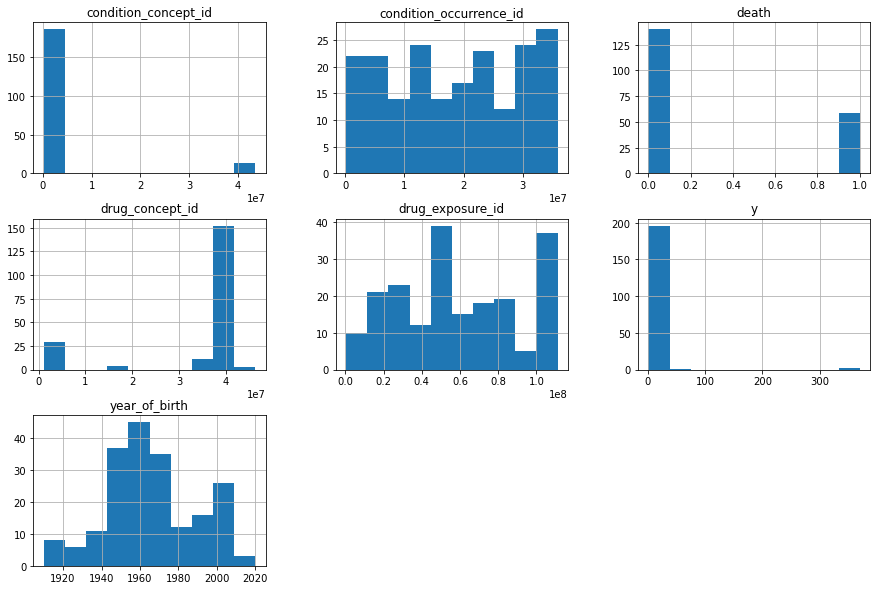

In [27]:
final_df.hist(figsize=(15,10))

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 13605 to 2843890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visit_start_datetime     199 non-null    object 
 1   condition_occurrence_id  199 non-null    float64
 2   condition_concept_id     199 non-null    float64
 3   y                        199 non-null    float64
 4   drug_exposure_id         199 non-null    float64
 5   drug_concept_id          199 non-null    float64
 6   death                    199 non-null    float64
 7   year_of_birth            199 non-null    int64  
 8   gender_source_value      199 non-null    object 
 9   ethnicity_source_value   199 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 17.1+ KB


In [29]:
final_df.describe()

,condition_occurrence_id,condition_concept_id,y,drug_exposure_id,drug_concept_id,death,year_of_birth
count,1.990000e+02,1.990000e+02,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000
mean,1.846834e+07,3.517976e+06,12.246231,5.836908e+07,3.390581e+07,0.296482,1965.467337
std,1.087666e+07,1.055919e+07,35.470498,3.172498e+07,1.380488e+07,0.457858,23.236111
min,1.707320e+05,1.962360e+05,1.000000,4.427950e+05,1.114379e+06,0.000000,1910.000000
25%,7.870201e+06,2.558480e+05,4.000000,2.738471e+07,4.016097e+07,0.000000,1951.000000
50%,1.860014e+07,2.558480e+05,10.000000,5.432134e+07,4.016097e+07,0.000000,1962.000000
75%,2.885068e+07,4.343205e+05,12.000000,8.143795e+07,4.016097e+07,1.000000,1985.000000
max,3.582967e+07,4.353065e+07,370.000000,1.110313e+08,4.627512e+07,1.000000,2020.000000


In [30]:
label = LabelEncoder()
final_df['condition_concept_id'] = label.fit_transform(final_df.condition_concept_id)
final_df['drug_concept_id'] = label.fit_transform(final_df.drug_concept_id)
final_df['gender_source_value'] = label.fit_transform(final_df.gender_source_value)

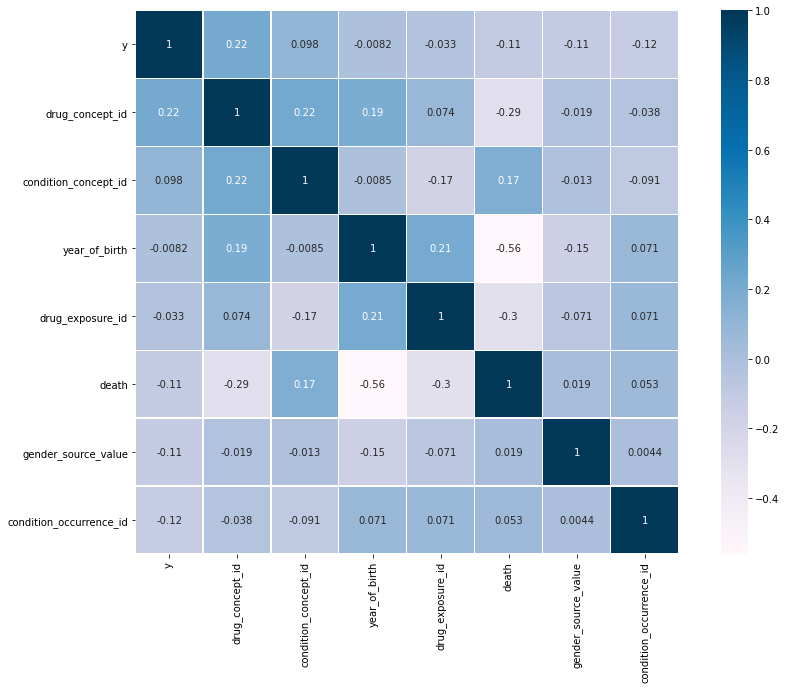

In [31]:
corr_data = final_df[final_df.keys()]
color_map = plt.cm.PuBu
cols = corr_data.corr().nlargest(10,'y')['y'].index
cm = np.corrcoef(final_df[cols].values.T)
f, ax = plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(cm, vmax=1, linewidths=0.1,square=True,annot=True,
                       cmap=color_map, linecolor="white",xticklabels = cols.values ,yticklabels = cols.values)

In [32]:
final_df.drop(['ethnicity_source_value','condition_occurrence_id','drug_exposure_id',
              'visit_start_datetime'],axis=1,inplace=True)
final_df

,condition_concept_id,y,drug_concept_id,death,year_of_birth,gender_source_value
person_id,,,,,,
13605,1,12.0,12,0.0,1956,1
31196,1,10.0,12,1.0,1944,1
38036,1,10.0,12,0.0,1990,1
52609,1,9.0,12,0.0,1973,1
67212,1,1.0,15,1.0,1964,0
...,...,...,...,...,...,...
2821459,1,10.0,12,0.0,1962,1
2833968,0,10.0,2,1.0,1920,1
2833968,1,19.0,12,1.0,1920,1


In [33]:
train , test = final_df[math.ceil(len(final_df)*0.2):],final_df[-math.ceil(len(final_df)*0.2):]
print(train.shape,test.shape)

(159, 6) (40, 6)


In [34]:
x_train = train.drop('y',axis=1)
y_train = train.y
print(x_train.shape,y_train.shape)

(159, 5) (159,)


In [35]:
x_test = test.drop('y',axis=1)
y_test = test.y
print(x_test.shape,y_test.shape)

(40, 5) (40,)


In [36]:
kf = KFold(n_splits=10,shuffle=True)

In [37]:
def MAPELoss(output,target):
    return np.mean(np.abs((target - output)/ target))

In [38]:
Cat = CatBoostRegressor()
XGB = XGBRegressor()
LGB = LGBMRegressor()
RF = RandomForestRegressor()

voting = VotingRegressor(estimators=[
    ('catboost',Cat),
    ('xgboost',XGB),
    ('LGB',LGB),
    ('RandomForest',RF)
])
voting_model = voting.fit(x_train.values,y_train.values)
pred = voting_model.predict(x_test.values)

Learning rate set to 0.028135
0:	learn: 5.0343271	total: 164ms	remaining: 2m 43s
1:	learn: 4.9672418	total: 166ms	remaining: 1m 22s
2:	learn: 4.8960557	total: 168ms	remaining: 55.7s
3:	learn: 4.8411901	total: 169ms	remaining: 42.2s
4:	learn: 4.7677825	total: 171ms	remaining: 34s
5:	learn: 4.6938729	total: 173ms	remaining: 28.6s
6:	learn: 4.6353589	total: 174ms	remaining: 24.7s
7:	learn: 4.5844190	total: 175ms	remaining: 21.8s
8:	learn: 4.5248445	total: 176ms	remaining: 19.4s
9:	learn: 4.4687520	total: 178ms	remaining: 17.6s
10:	learn: 4.4173892	total: 179ms	remaining: 16.1s
11:	learn: 4.3647804	total: 181ms	remaining: 14.9s
12:	learn: 4.3076211	total: 182ms	remaining: 13.8s
13:	learn: 4.2536755	total: 184ms	remaining: 12.9s
14:	learn: 4.2036631	total: 185ms	remaining: 12.1s
15:	learn: 4.1503477	total: 186ms	remaining: 11.5s
16:	learn: 4.1051801	total: 188ms	remaining: 10.9s
17:	learn: 4.0607508	total: 189ms	remaining: 10.3s
18:	learn: 4.0154472	total: 190ms	remaining: 9.83s
19:	learn: 

In [39]:
print('voting')
score = MAPELoss(pred,y_test.values)
print('Test set result MAPE:{:.3f}'.format(score))

voting
Test set result MAPE:0.129


In [41]:
def plot_result(pred):
    plt.figure(figsize=(20,10))
    plt.plot(pred,label='RandomForest_pred')
    plt.plot(y_test.values,label='real_hospitalization')
    plt.title('Compare real_hospitalization with prediction')
    plt.legend()
    plt.grid()
    return plt.show()

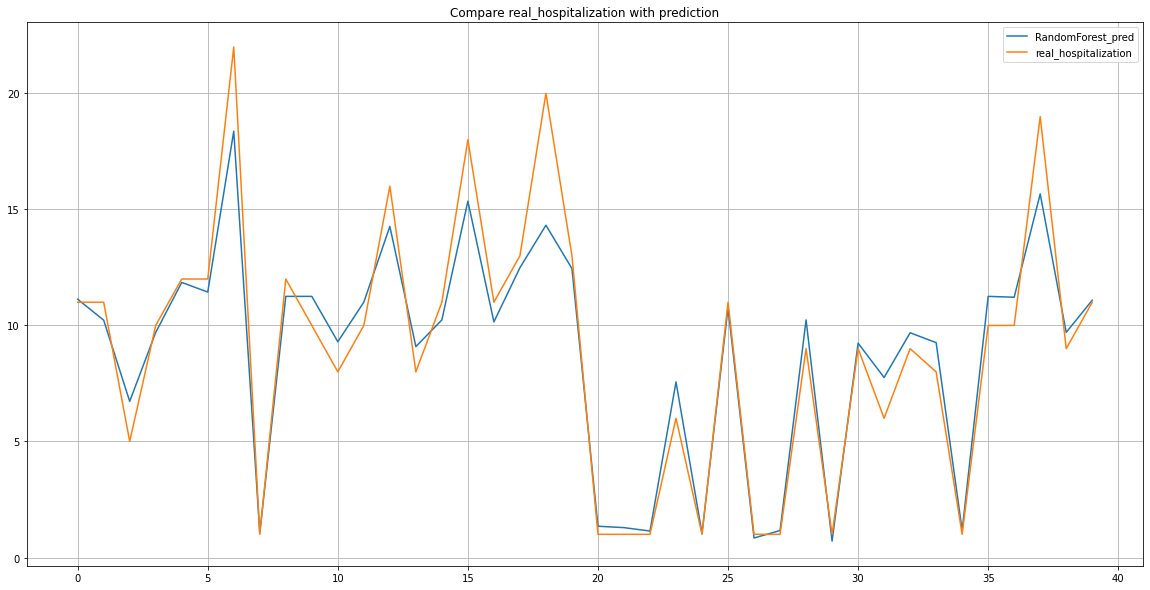

In [42]:
plot_result(pred)

In [43]:
def RF_model(n_estimators,n_jobs):
    RF_models = []
    for fold, (train_idx,valid_idx) in enumerate(kf.split(x_train,y_train)):
        train_x , valid_x = x_train.values[train_idx], x_train.values[valid_idx]
        train_y , valid_y = y_train.values[train_idx], y_train.values[valid_idx]
        print(f'Fold:{fold+1}')
        model = RandomForestRegressor(n_estimators=n_estimators,n_jobs=n_jobs,random_state=0)
        model.fit(train_x,train_y)
        pred = model.predict(valid_x)
        score = MAPELoss(pred,valid_y)
        print(f'MAPE:{score}')
        RF_models.append(model)
    return RF_models
    

In [44]:
estimator_300 = RF_model(300,8)
estimator_1000 = RF_model(1000,8)

Fold:1
MAPE:0.1927759864364031
Fold:2
MAPE:0.3624646609590806
Fold:3
MAPE:0.3398173826559242
Fold:4
MAPE:0.13434412073266236
Fold:5
MAPE:0.43350280911218414
Fold:6
MAPE:0.2514551296585562
Fold:7
MAPE:0.3339643717008301
Fold:8
MAPE:0.2408021549823633
Fold:9
MAPE:0.2927329045092526
Fold:10
MAPE:0.6682922543557266
Fold:1
MAPE:0.2800236025620791
Fold:2
MAPE:0.14993911740747673
Fold:3
MAPE:0.16876362411315537
Fold:4
MAPE:0.08988357995014246
Fold:5
MAPE:0.47412156635488045
Fold:6
MAPE:0.6578888021353646
Fold:7
MAPE:0.392993196941947
Fold:8
MAPE:0.3234627995305785
Fold:9
MAPE:0.5055319710501237
Fold:10
MAPE:0.21044920922360996


In [45]:
def predict(models):
    RF_results = []
    for model in models:
        pred = model.predict(x_test)
        RF_results.append(pred)
    RF_pred = np.mean(RF_results,axis=0)
    return RF_pred

In [46]:
estimator_300_result = predict(estimator_300)
estimator_1000_result = predict(estimator_1000)

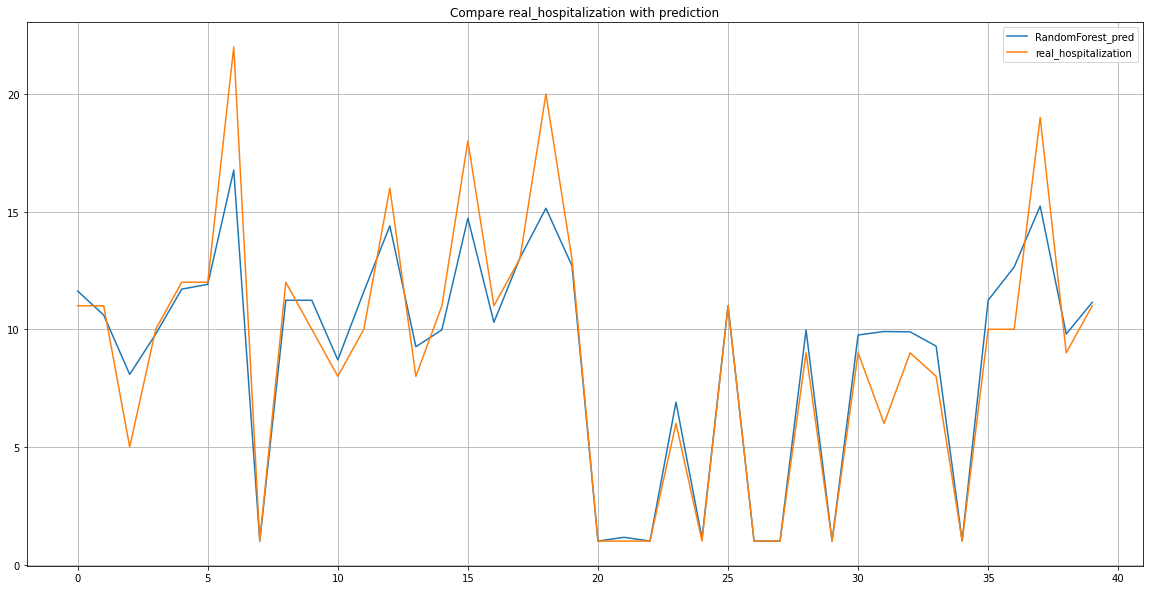

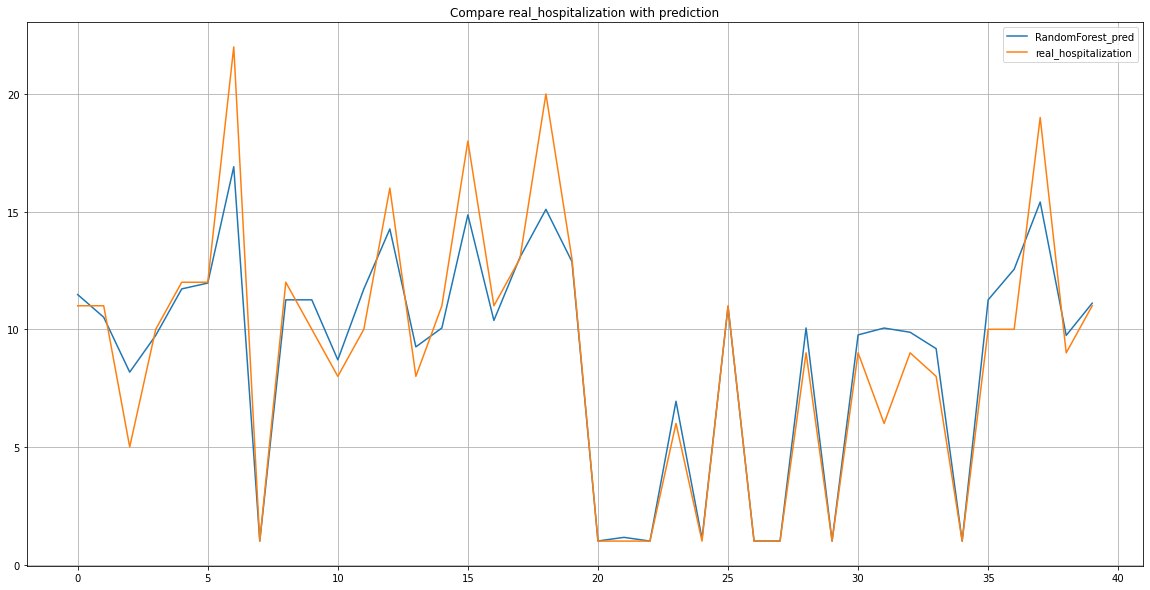

In [48]:
plot_result(estimator_300_result)
plot_result(estimator_1000_result)

In [49]:
print('n_estimator:300')
score = MAPELoss(estimator_300_result,y_test.values)
print('Test set result MAPE:{:.3f}'.format(score))
print('n_estimator:1000')
score = MAPELoss(estimator_1000_result,y_test.values)
print('Test set result MAPE:{:.3f}'.format(score))

n_estimator:300
Test set result MAPE:0.113
n_estimator:1000
Test set result MAPE:0.113


In [50]:
n_estimators = [int(x) for x in np.linspace(1000, 10000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
num_leaves = [10,20,30,40]
learning_rate = [1e-1,1e-2,1e-3,1e-4]

random_grid_LGB = {'n_estimators':n_estimators,
                 'max_depth':max_depth,
                  'num_leaves':num_leaves,
                  'learning_rate':learning_rate
                 }

In [51]:
LGB = LGBMRegressor(objective='regression')
LGB_random = RandomizedSearchCV(estimator=LGB,param_distributions=random_grid_LGB,n_iter=100,cv=5,
                              verbose=2,random_state=0,n_jobs=-1)
LGB_random.fit(x_train.values,y_train.values)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(objective='regression'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001,
                                                          0.0001],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'n_estimators': [1000, 2000, 3000, 4000,
                                                         5000, 6000, 7000, 8000,
                                                         9000, 10000],
                                        'num_leaves': [10, 20, 30, 40]},
                   random_state=0, verbose=2)

In [52]:
LGB_random.best_params_

{'num_leaves': 20,
 'n_estimators': 2000,
 'max_depth': 65,
 'learning_rate': 0.001}

In [53]:
models = []
for fold, (train_idx,valid_idx) in enumerate(kf.split(x_train,y_train)):
    train_x , valid_x = x_train.values[train_idx], x_train.values[valid_idx]
    train_y , valid_y = y_train.values[train_idx], y_train.values[valid_idx]
    print(f'Fold:{fold+1}')
    model = LGBMRegressor(objective='regression',
                         max_depth=65,
                         n_estimators=2000,
                          learning_rate=0.001,
                          num_leaves=20
                         )
    model.fit(train_x,train_y,
             eval_set=[(valid_x,valid_y)],
             eval_metric=['mape'],
             early_stopping_rounds=1000,
             verbose=500)
    models.append(model)
    
    

Fold:1
Training until validation scores don't improve for 1000 rounds
[500]	valid_0's mape: 1.3432	valid_0's l2: 35.6151
[1000]	valid_0's mape: 0.933347	valid_0's l2: 35.7902
[1500]	valid_0's mape: 0.684473	valid_0's l2: 37.2578
Early stopping, best iteration is:
[689]	valid_0's mape: 1.15621	valid_0's l2: 35.3567
Fold:2
Training until validation scores don't improve for 1000 rounds
[500]	valid_0's mape: 0.818013	valid_0's l2: 16.7619
[1000]	valid_0's mape: 0.622417	valid_0's l2: 13.4939
[1500]	valid_0's mape: 0.513019	valid_0's l2: 12.1015
[2000]	valid_0's mape: 0.449352	valid_0's l2: 11.5416
Did not meet early stopping. Best iteration is:
[2000]	valid_0's mape: 0.449352	valid_0's l2: 11.5416
Fold:3
Training until validation scores don't improve for 1000 rounds
[500]	valid_0's mape: 1.29224	valid_0's l2: 15.0223
[1000]	valid_0's mape: 1.14668	valid_0's l2: 13.9838
[1500]	valid_0's mape: 1.06688	valid_0's l2: 14.0764
[2000]	valid_0's mape: 1.02357	valid_0's l2: 14.4279
Did not meet ear

In [54]:
LGB_results = []
for model in models:
    pred = model.predict(x_test)
    LGB_results.append(pred)
LGB_pred = np.mean(LGB_results,axis=0)

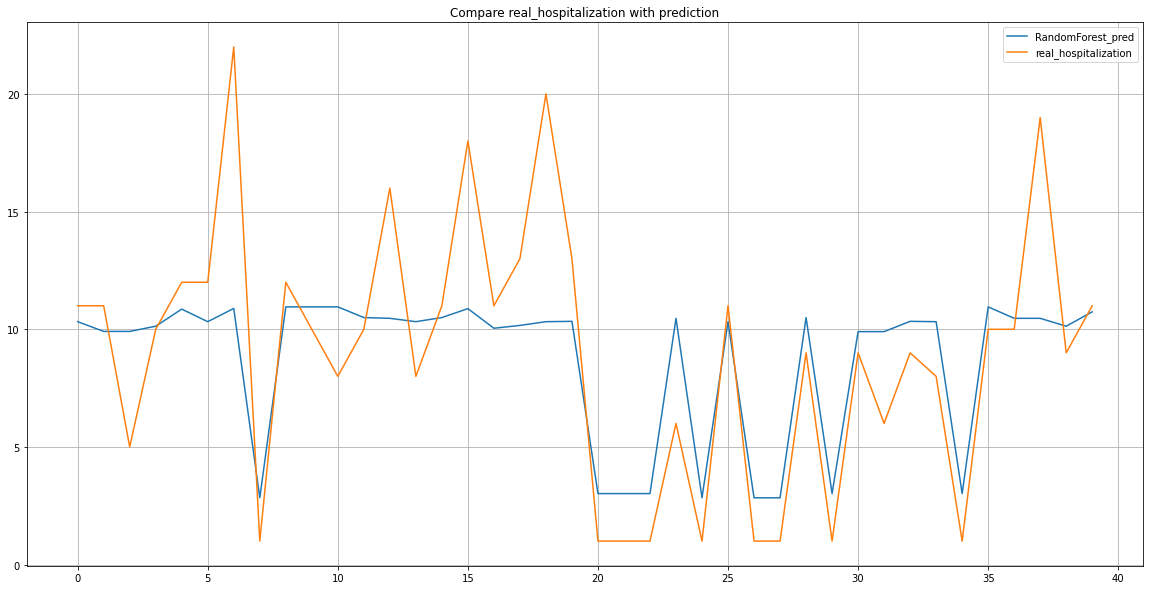

In [55]:
plot_result(LGB_pred)

In [56]:
print('LGB best_params')
score = MAPELoss(LGB_pred,y_test.values)
print('Test set result MAPE:{:.3f}'.format(score))

LGB best_params
Test set result MAPE:0.623
